#  Bouldering Analysis Notebook

 This notebook explores computer vision techniques to analyze climbing wall images. 
 The goal is to develop methods for automatically analyzing climbing wall layouts and routes.

 ## Basic Preprocessing
 
 The first step is to preprocess the images to make them easier to analyze:
 
 1. Convert to grayscale to focus on intensity values
 2. Detect edges using Canny / Laplacian / Sobel edge detection
 3. Detect edges after applying noise reduction using Gaussian blur / Median filter and a combination of Gaussian + Median
 4. Visualize the intermediate results at each step

 This preprocessing pipeline will help highlight key features like holds and wall structures
 while reducing noise and irrelevant details.


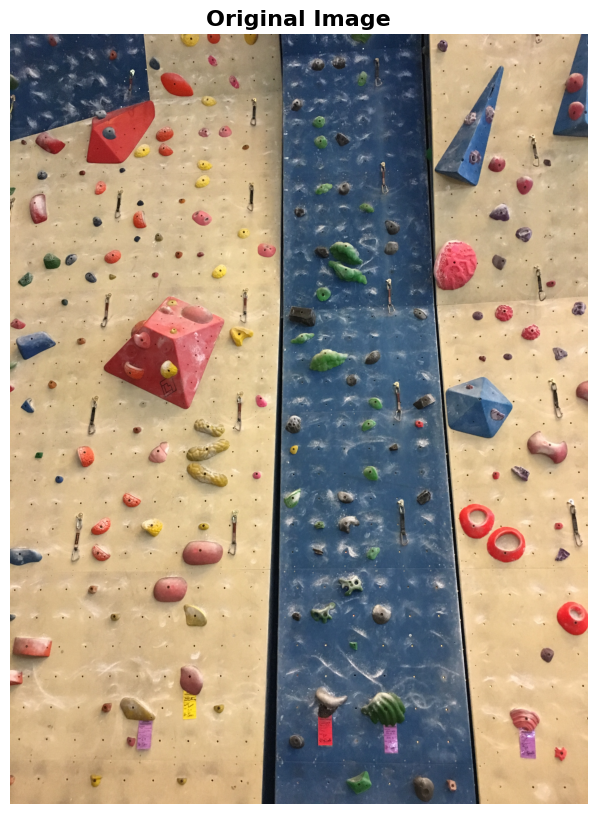

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image
img_path = 'immagini test/IMG_001.JPG'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
plt.title('Original Image', fontsize=16, fontweight='bold')
plt.show()

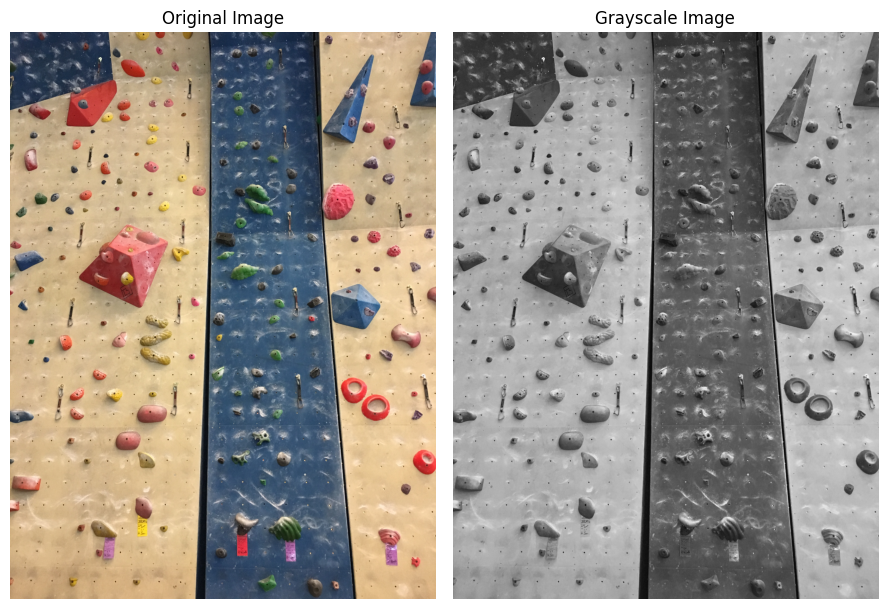

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display original and grayscale images side by side
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Function to process edges for visualization: finds contours and draws them on a black background with thicker lines for better visibility
def process_edges_for_visualization(edges, thickness=3):    
    # Find contours in the edge image
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a black background image
    processed_image = np.zeros_like(edges)

    # Draw the contours in white with slightly thicker lines for better visibility
    processed_image = cv2.drawContours(processed_image, contours, -1, (255), thickness=thickness)
    
    return processed_image

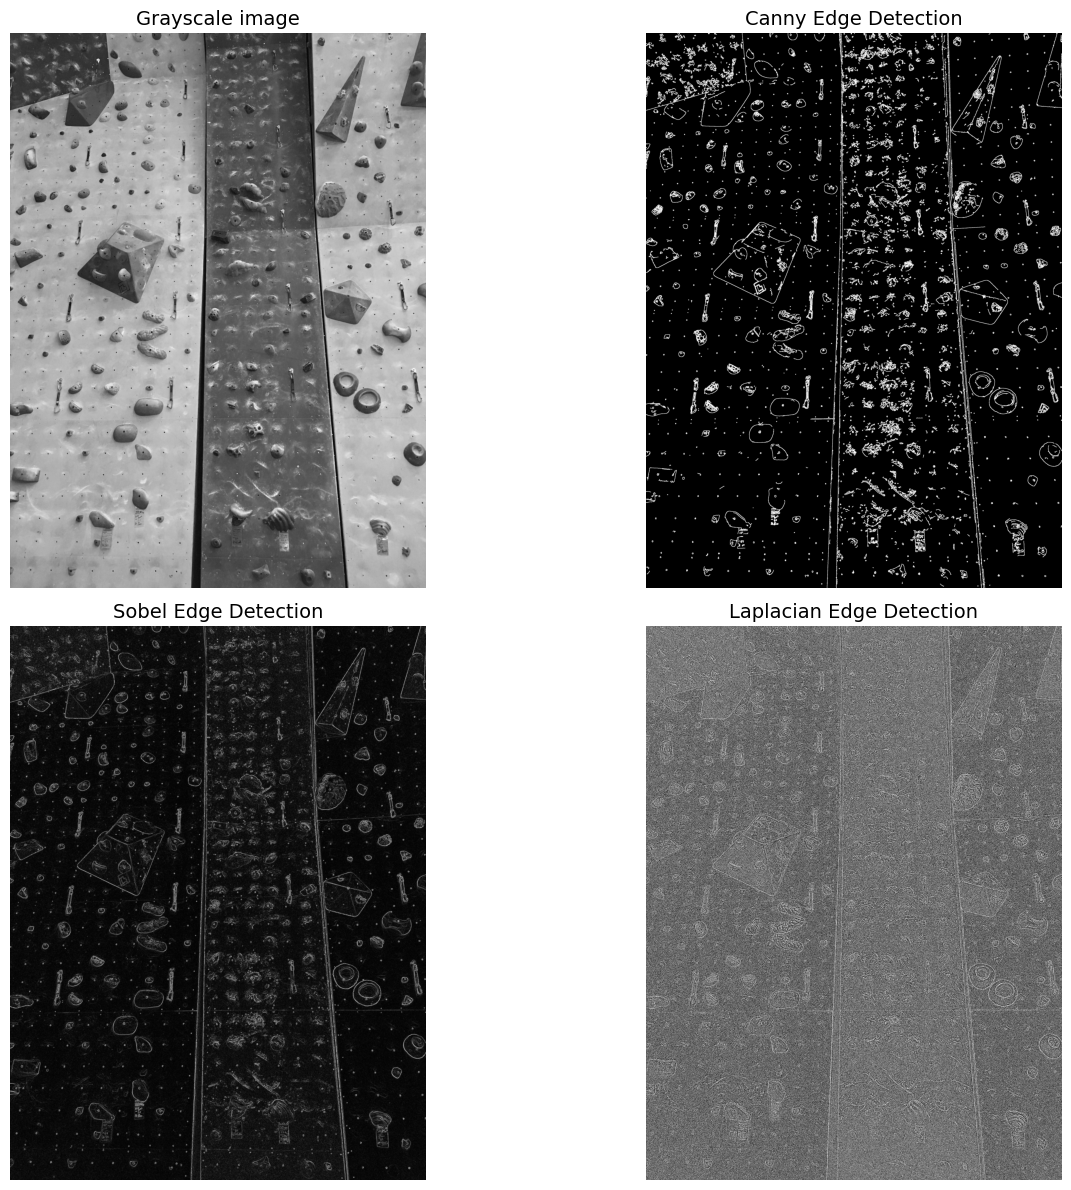

In [5]:
# Edge Detection Analysis
def detect_edges(image, method='canny', **kwargs):
    if method == 'canny':
        # Default values if not provided
        threshold1 = kwargs.get('threshold1', 100)
        threshold2 = kwargs.get('threshold2', 200)
        return cv2.Canny(image, threshold1, threshold2)
    elif method == 'sobel':
        # Compute gradients in x and y directions
        sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        # Combine gradients
        return np.uint8(np.sqrt(sobelx**2 + sobely**2))
    elif method == 'laplacian':
        return cv2.Laplacian(image, cv2.CV_64F).astype(np.uint8)

# Apply different edge detection methods
canny_edges = process_edges_for_visualization(detect_edges(gray, 'canny', threshold1=50, threshold2=150), thickness=2)
sobel_edges = detect_edges(gray, 'sobel')
laplacian_edges = detect_edges(gray, 'laplacian')

# Create figure for comparison
plt.figure(figsize=(15, 12))

# Original grayscale
plt.subplot(2, 2, 1)
plt.title('Grayscale image', fontsize=14)
plt.imshow(gray, cmap='gray')
plt.axis('off')

# Canny edges
plt.subplot(2, 2, 2)
plt.title('Canny Edge Detection', fontsize=14)
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

# Sobel edges
plt.subplot(2, 2, 3)
plt.title('Sobel Edge Detection', fontsize=14)
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

# Laplacian edges
plt.subplot(2, 2, 4)
plt.title('Laplacian Edge Detection', fontsize=14)
plt.imshow(laplacian_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

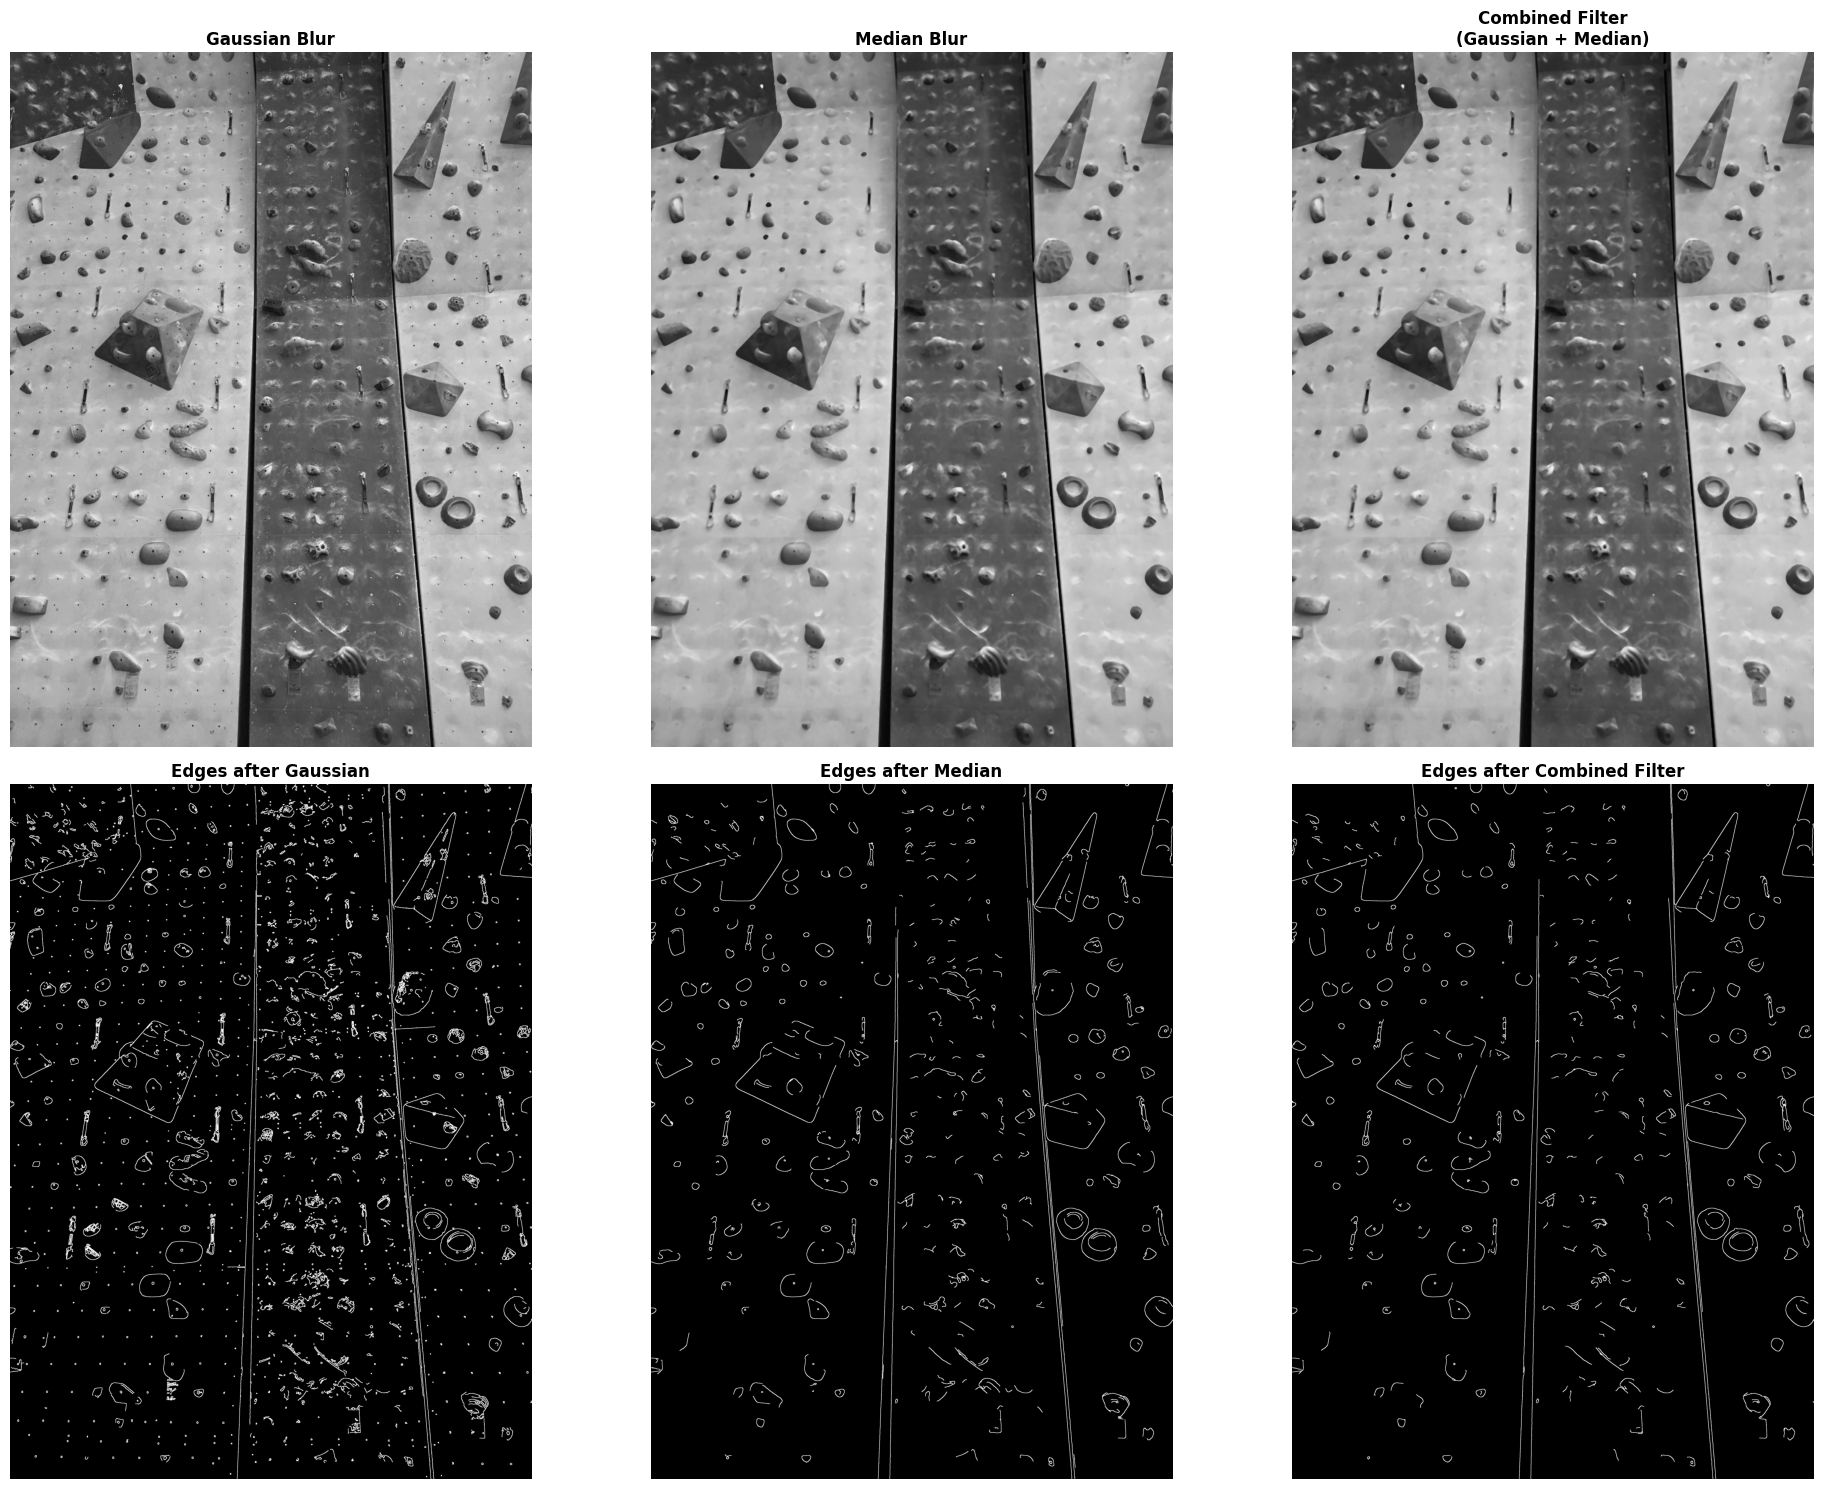

In [6]:
# Define the custom combined filter
def custom_combined_filter(image, gaussian_kernel=(5,5), median_kernel=15, gaussian_sigma=0):
    # First apply Gaussian blur
    gaussian_result = cv2.GaussianBlur(image, gaussian_kernel, gaussian_sigma)
    # Then apply Median blur
    final_result = cv2.medianBlur(gaussian_result, median_kernel)
    return final_result

# Apply filters
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)
median_blur = cv2.medianBlur(gray, 15)
combined_blur = custom_combined_filter(gray, gaussian_kernel=(5,5), median_kernel=15, gaussian_sigma=0)

# Apply edge detection to each filtered version
canny_gaussian = process_edges_for_visualization(detect_edges(gaussian_blur, 'canny', threshold1=50, threshold2=150), thickness=2)
canny_median = process_edges_for_visualization(detect_edges(median_blur, 'canny', threshold1=50, threshold2=150), thickness=2)
canny_combined = process_edges_for_visualization(detect_edges(combined_blur, 'canny', threshold1=50, threshold2=150), thickness=2)

# Create comparison figure
plt.figure(figsize=(20, 15))

# First row: Filtered images
plt.subplot(2, 3, 1)
plt.title('Gaussian Blur', fontsize=12, fontweight='bold')
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Median Blur', fontsize=12, fontweight='bold')
plt.imshow(median_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Combined Filter\n(Gaussian + Median)', fontsize=12, fontweight='bold')
plt.imshow(combined_blur, cmap='gray')
plt.axis('off')

# Second row: Edge detection results
plt.subplot(2, 3, 4)
plt.title('Edges after Gaussian', fontsize=12, fontweight='bold')
plt.imshow(canny_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Edges after Median', fontsize=12, fontweight='bold')
plt.imshow(canny_median, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Edges after Combined Filter', fontsize=12, fontweight='bold')
plt.imshow(canny_combined, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

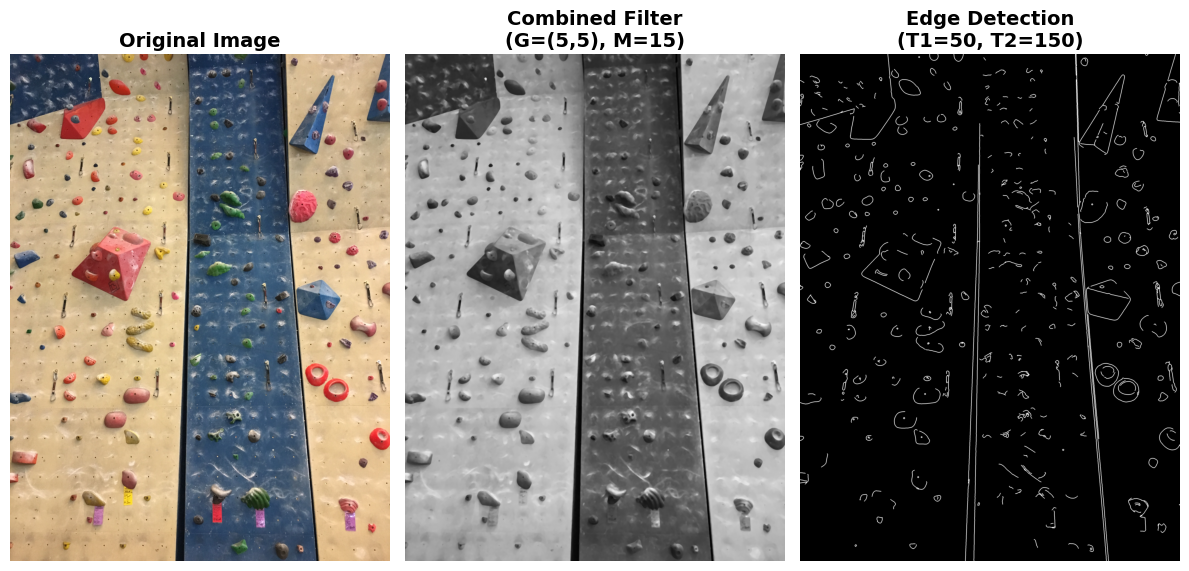

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Apply combined filter
filtered = custom_combined_filter(
    gray, 
    gaussian_kernel=(5,5),
    median_kernel=15
)

# Apply edge detection
edges = process_edges_for_visualization(cv2.Canny(filtered, 50, 150), thickness=3)

# Create subplots
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(132)
plt.imshow(filtered, cmap='gray')
plt.title(f'Combined Filter\n(G=(5,5), M=15)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(133)
plt.imshow(edges, cmap='gray')
plt.title(f'Edge Detection\n(T1=50, T2=150)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()


### Image Preprocessing summary

The preprocessing stage focused on noise reduction while preserving critical edge information for hold detection. After comparing different filtering approaches:

- **Combined Gaussian and Median Filter**: Selected as optimal solution
  - Gaussian filter (5x5) reduces initial noise and smooths image
  - Median filter (15x15) removes (some) remaining chalk marks and unwanted spots
  - Two-stage approach preserves hold edges better than single filter
  - Large median kernel handles substantial noise patches

- **Alternative Approaches**:
  - Median filter only: Less effective at preserving edges
  - Gaussian blur only: Caused excessive edge softening
  - Smaller kernels: Insufficient for larger noise areas

While the combined filtering approach produced cleaner images with better edge preservation, some challenges remain:

- **Residual Chalk Noise**: White chalk marks on holds still create bright spots that:
  - Introduce false edges within holds
  - Make it difficult to detect complete hold boundaries
  - Result in fragmented or missed hold detections

#### The next preprocessing step will focus specifically on reducing the impact of remaining chalk marks to improve hold detection accuracy.

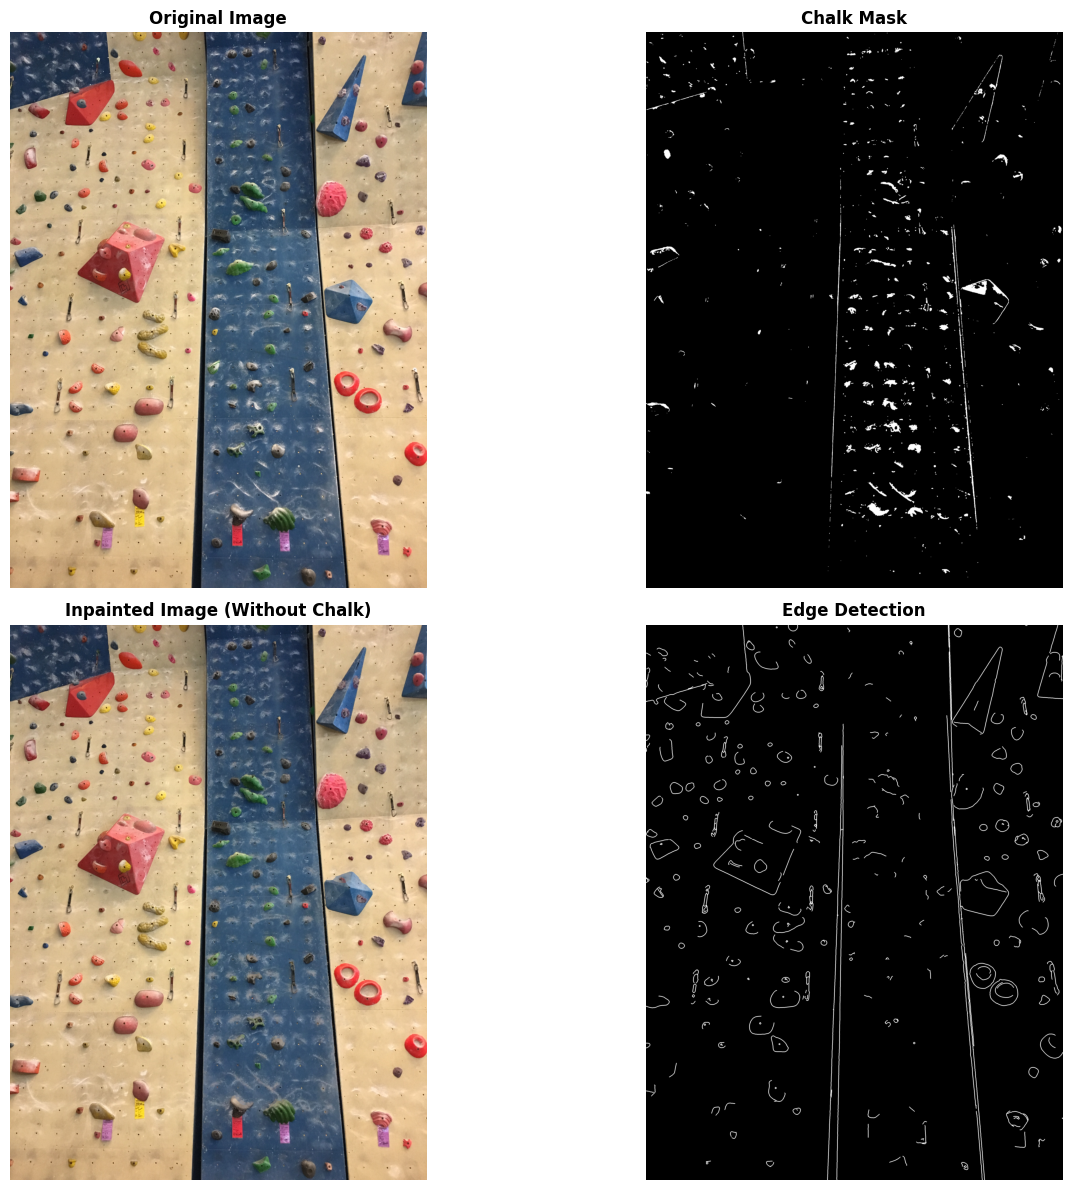

In [8]:
def preprocess_climbing_wall_with_inpainting(image):
    # Convert RGB to HSV
    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Adjust HSV range for chalk (white/light colors)
    lower_bound = np.array([0, 0, 160])  
    upper_bound = np.array([180, 50, 255])  
    
    # Create mask for chalk
    chalk_mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
    
    # Apply morphological operations to refine the mask
    kernel = np.ones((3, 3), np.uint8)
    chalk_mask = cv2.dilate(chalk_mask, kernel, iterations=1)
    
    # Use inpainting to replace chalk with surrounding colors
    inpainted_img = cv2.inpaint(image, chalk_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    
    return inpainted_img, chalk_mask

# Visualization code
plt.figure(figsize=(15, 12))

# Process the image
inpainted_img, chalk_mask = preprocess_climbing_wall_with_inpainting(img)

# Convert to grayscale for edge detection
gray_no_chalk = cv2.cvtColor(inpainted_img, cv2.COLOR_RGB2GRAY)

# Apply combined filter
filtered = custom_combined_filter(
    gray_no_chalk, 
    gaussian_kernel=(5,5),
    median_kernel=15
)

# Apply edge detection
edges = process_edges_for_visualization(cv2.Canny(filtered, 50, 150), thickness=3)

# Create subplots
plt.subplot(221)
plt.imshow(img)
plt.title('Original Image', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(222)
plt.imshow(chalk_mask, cmap='gray')
plt.title('Chalk Mask', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(223)
plt.imshow(inpainted_img)
plt.title('Inpainted Image (Without Chalk)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(224)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection', fontsize=12, fontweight='bold')
plt.axis('off')

plt.tight_layout()

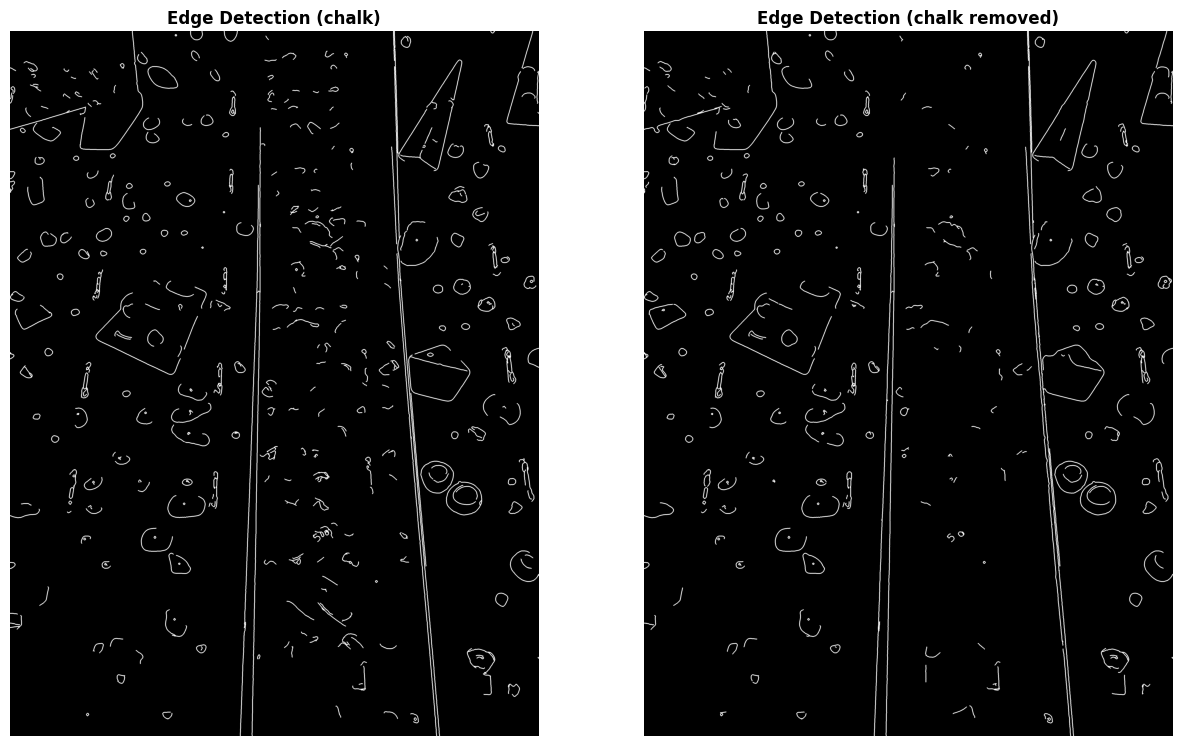

In [9]:
plt.figure(figsize=(15, 12))

# Apply combined filter
filtered_with_chalk = custom_combined_filter(
    gray, 
    gaussian_kernel=(5,5),
    median_kernel=15
)

# Apply edge detection
edges_with_chalk = process_edges_for_visualization(cv2.Canny(filtered_with_chalk, 50, 150), thickness=3)
edges_no_chalk = process_edges_for_visualization(cv2.Canny(filtered, 50, 150), thickness=3)


plt.subplot(1,2,1)
plt.imshow(edges_with_chalk, cmap='gray')
plt.title('Edge Detection (chalk)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges_no_chalk, cmap='gray')
plt.title('Edge Detection (chalk removed)', fontsize=12, fontweight='bold')
plt.axis('off')
plt.show()

### Chalk Removal Processing Summary

The chalk removal stage uses HSV color thresholding and inpainting to reduce noise from chalk marks. Key findings:

- **Chalk Detection and Removal**:
  - Detects chalk using HSV thresholds (Value > 150, Saturation < 60)
  - Applies morphological dilation to refine the chalk mask
  - Uses Telea inpainting algorithm with 3px radius to fill chalk regions
  - Preserves underlying wall and hold textures

- **Preprocessing Pipeline**:
  - Creates binary mask of chalk regions using color thresholds
  - Performs inpainting to reconstruct chalk areas from surrounding pixels
  - Applies Gaussian (7x7) and median (15x15) filtering before edge detection

- **Impact on Edge Detection**:
  - Significantly reduces spurious edges from chalk marks
  - Maintains key hold boundaries and features
  - Produces cleaner Canny edge maps (thresholds 50-150)

The combined approach of HSV-based chalk detection and inpainting shows good results in reducing chalk noise while preserving important climbing hold features.
